author: leezeeyee   
date: 2021/4/14        
link: [github](https://github.com/easilylazy/pattern-recognition) 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Lecture7-8编程作业
训练集: 中国与日本的沿海城市的经纬度坐标向量，中国标签为+1, 日本为标签为-1.
测试集: 钓鱼岛的经纬度坐标向量
用支撑向量机设计分类器，（1）判断钓鱼岛属于哪一类；（2）增加几个非海边城市的经纬度坐标进行训练，判断这些城市是否影响分类结果，是否为支撑向量


## load_data

In [4]:
#中国沿海城市的坐标集
X1 = np.array([
    [119.1,34.4],
    [121.3,29.5],
    [120.2,36.1],
    [119.4,39.6],
    [113.5,22.3],
    [118.1,24.5],
    [121.4,34.5],
    [114.1,22.6],
    [110.1,20.3],
    [123.3,38.6],
    [117.2,39.1]])
X1_add = np.array([
    [114,30],
    [116,24],
    [117,32]])

In [5]:
#日本沿海城市的坐标集
X2 = np.array([
    [130.3,32.3],
    [130.6,33.6],
    [139.4,35.3],
    [135.1,34.4],
    [136.6,35.1],
    [130.4,33.6],
    [132.3,34.2],
    [130.5,33.4],
    [129.9,32.8],
    [135.3,34.4],
    [139.5,35.4]])
X2_add = np.array([
    [141,38],
    [138,36],
    [135,35]])


In [6]:
island=np.asarray([123,25])

In [7]:
D=np.r_[X1,X2]
Y=np.r_[np.ones([len(X1),1]),-np.ones([len(X2),1])]

In [8]:
D[:3]

array([[119.1,  34.4],
       [121.3,  29.5],
       [120.2,  36.1]])

print(D_sh[12])
D_sh[16]

In [9]:
index=np.arange(len(D))
np.random.shuffle(index)
D_sh=D[index]
Y_sh=Y[index]

In [10]:
Y_sh[:3]

array([[ 1.],
       [-1.],
       [ 1.]])

In [11]:
def normalize(v):
    norm = np.linalg.norm(v)
    print(norm)
    if norm == 0: 
       return v
    return v / norm

In [12]:
D_n=np.zeros(D_sh.shape)
D_n[:,0]=normalize(D_sh[:,0])*10
D_n[:,1]=normalize(D_sh[:,1])*10

591.4445874297946
154.64352556767452


In [13]:
island_n=np.zeros(island.shape)
island_n[0]=island[0]/591.4445874297946*10
island_n[1]=island[1]/154.6435255676745*10

In [14]:
D[:,0]

array([119.1, 121.3, 120.2, 119.4, 113.5, 118.1, 121.4, 114.1, 110.1,
       123.3, 117.2, 130.3, 130.6, 139.4, 135.1, 136.6, 130.4, 132.3,
       130.5, 129.9, 135.3, 139.5])

class Point():
    def __init__(self,x,y):
        self.x=x
        self.y=y
W1=W.reshape(3)
print(W1)
k=-W1[1]/W1[2]
b=-W1[0]/W1[2]
scale=100
P1=Point(scale,k*scale+b)
P2=Point(-scale,-k*scale+b)
plt.scatter(D[:,0],D[:,1],marker = 'o', s=20, cmap = plt.cm.Spectral)
plt.plot([P1.x,P2.x],[P1.y,P2.y],'-')
# for data in D:
#     plt.scatter(data[0],data[1])

## Train

In [15]:
def addSingleBias(X):
    N=X.shape[0]
    X=np.reshape(X,[N,1])
    bias_vector=np.ones([1,1])
    return np.row_stack((bias_vector,X))
def addBias(X):
    '''
    为维数为N,d的向量X添加偏置向量
    Args:
        X(numpy.ndarray):shape为[N,d]
    Returns:
        numpy.ndarray:shape为[N,d+1]，且第一列列向量全为1
    '''
    
    try:
        N=X.shape[0]
        d=X.shape[1]
        if d == 1:
            return addSingleBias(X)
        bias_vector=np.ones([N,1])
        return np.column_stack((bias_vector,X))
        
    except:
        return addSingleBias(X)

In [16]:
W=np.zeros([3,1])


In [17]:
D[:,0]-120

array([-0.9,  1.3,  0.2, -0.6, -6.5, -1.9,  1.4, -5.9, -9.9,  3.3, -2.8,
       10.3, 10.6, 19.4, 15.1, 16.6, 10.4, 12.3, 10.5,  9.9, 15.3, 19.5])

In [18]:
class Point():
    def __init__(self,x,y):
        self.x=x
        self.y=y

In [19]:
def hingeLoss(D,Y,W,learning_rate=0.01,maxStep=100,show=False):
    minErr=1000*np.ones([1,1])
    W_end=W
    
    for iteration in range(maxStep):
            Pass=True
            # for i in range(len(D)):
            #     X=addBias(D[i])
            #     yn=Y[i]
            #     Err=1-yn*np.dot(W.transpose(),X)
            #     # print('err: '+str(Err))
            #     if Err>0:
            #         Pass=False
            #         dErr_dW=-yn*X
                    
            #         # W-=learning_rate*dErr_dW
            #         if show is False:
            #             print('data: '+str(i))
            #             print('err: '+str(Err))
            #             print('derr: '+str(dErr_dW))
            #         # print(W)
            totalErr=np.zeros([1,1])
            totaldErr=np.zeros(W.shape)
            for i in range(len(D)):
                X=addBias(D[i])
                yn=Y[i]
                Err=1-yn*np.dot(W.transpose(),X)
                dErr_dW=-yn*X
                # print('err: '+str(Err))
                if Err>0:
                    totalErr+=Err
                    totaldErr+=dErr_dW

            if True:#totalErr<minErr:
                W-=learning_rate*totaldErr
                # print(totalErr)
                minErr=totalErr
                W_end=W
                if show==True:
                    clear_output(wait=True)
                    W1=W.reshape(3)
                    # print(W1)
                    k=-W1[1]/W1[2]
                    b=-W1[0]/W1[2]
                    scale=1000
                    plt.figure(figsize=(7,5))
                    P1=Point(scale,k*scale+b)
                    P2=Point(-scale,-k*scale+b)
                    plt.scatter(D[:,0],D[:,1],marker = 'o', s=20, cmap = plt.cm.Spectral)
                    plt.scatter(island_n[0],island_n[1],marker = '*', s=20, cmap = plt.cm.Spectral)
                    plt.plot([P1.x,P2.x],[P1.y,P2.y],'-')
                    plt.xlim((0, 4))
                    plt.ylim((0, 4))   
                    plt.show()
        
            if Pass is True:
                print('success')
                print(iteration)
                print(W)
                break

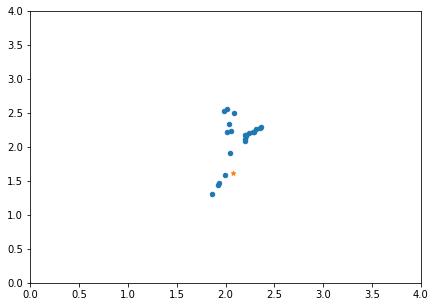

success
0
[[ 0.        ]
 [-0.00291152]
 [-0.00213394]]


In [20]:
# W=np.zeros([3,1])
hingeLoss(D=D_n,Y=Y_sh,W=W,learning_rate=0.001,maxStep=30,show=True)

In [21]:
print(W)

[[ 0.        ]
 [-0.00291152]
 [-0.00213394]]


## Jugde

In [22]:
np.dot(W.transpose(),addBias(island_n))

array([[-0.00950472]])

In [23]:
# W=np.asarray([[ 48.        ],
#  [-27.83523655],
#  [  5.60644228]])

if np.dot(W.transpose(),addBias(island_n))>0:
    print('China')
else:
    print('Japan')

Japan


In [24]:
hingeLoss(D=D_sh,Y=Y_sh,W=W,learning_rate=1,maxStep=3)

success
0
[[   0.        ]
 [-172.20291152]
 [ -33.00213394]]
